In [0]:
import os, sys

class FileSystem:
  def __init__(self, colab_dir="ntds_2019", local_dir="./", data_dir="data"):
    IN_COLAB = 'google.colab' in sys.modules
    if (IN_COLAB):
      from google.colab import drive
      drive.mount('/gdrive')
      self.root_dir = os.path.join("/gdrive/My Drive/", colab_dir)
    else:
      self.root_dir = local_dir
    self.data_dir = data_dir
    self.change_directory = False

  def data_path(self, name):
    return os.path.join(self.data_dir, name) if self.change_directory else os.path.join(self.root_dir, self.data_dir, name)

  def path(self, name):
    return os.path.join("./", name) if self.change_directory else os.path.join("./", self.root_dir, name)

  def cd(self):
    %cd {self.root_dir}
    %ls
    self.change_directory = True

fs = FileSystem()
fs.cd()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/ntds_2019
archives/                     kNN_ingredient_replacement.ipynb
CreateAdjacencyMatrix.ipynb   Network_Tour_Project_Summary.pdf
data/                         ntdsV2.ipynb
GCNN.ipynb                    papers/
graph_communities_V2.0.ipynb  recipe-cleaner.py
graphFiltering.ipynb          StudyingGraphProperties.ipynb
graphics/


In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
import itertools
import networkx as nx

In [0]:
adj_mat = np.load(fs.data_path('Ingredient_Adjacency_Matrix_Combined_Addition_Mean.npy'))
adj_mat.shape

(313, 313)

In [0]:
ingredient_list = np.load(fs.data_path('Ingredient_List_USDA_Nutrition_Info.npy'))
print(ingredient_list.shape)

(313,)


In [0]:
with open(fs.data_path('recipes_with_nutritional_info_fixed_qty.json')) as json_file:
    data = json.load(json_file)
df = pd.DataFrame(data)
df.head()

,fsa_lights_per100g,id,ingredients,instructions,nutr_per_ingredient,nutr_values_per100g,partition,quantity,title,unit,url,weight_per_ingr,check
0,"{'fat': 'green', 'salt': 'green', 'saturates':...",000095fc1d,"[{'text': 'yogurt, greek, plain, nonfat'}, {'t...",[{'text': 'Layer all ingredients in a serving ...,"[{'fat': 0.8845044000000001, 'nrg': 133.80964,...","{'energy': 81.12946131894766, 'fat': 2.1401392...",train,"[{'text': '8'}, {'text': '1'}, {'text': '1/4'}]",Yogurt Parfaits,"[{'text': 'ounce'}, {'text': 'cup'}, {'text': ...",http://tastykitchen.com/recipes/breakfastbrunc...,"[226.796, 152.0, 30.5]",NaN
1,"{'fat': 'red', 'salt': 'orange', 'saturates': ...",00051d5b9d,"[{'text': 'sugars, granulated'}, {'text': 'oil...",[{'text': 'Cream sugar and butter together til...,"[{'fat': 0.0, 'nrg': 384.0, 'pro': 0.0, 'sat':...","{'energy': 477.09640393594606, 'fat': 23.41248...",val,"[{'text': '1/2'}, {'text': '3/4'}, {'text': '1...","Salt Free, Low Cholesterol Sugar Cookies Recipe","[{'text': 'cup'}, {'text': 'cup'}, {'text': 'c...",http://cookeatshare.com/recipes/salt-free-low-...,"[100.80000000000001, 168.0, 21.25, 5.166666666...",NaN
2,"{'fat': 'orange', 'salt': 'orange', 'saturates...",00059b093b,"[{'text': 'chicken, broilers or fryers, wing, ...","[{'text': 'Preheat oven to 400 degrees F.'}, {...","[{'fat': 174.859716, 'nrg': 2599.0821599999995...","{'energy': 208.05898280960727, 'fat': 14.29704...",train,"[{'text': '3'}, {'text': '1'}, {'text': '1/2'}...",Honey Sriracha Chicken Wings,"[{'text': 'pound'}, {'text': 'teaspoon'}, {'te...",http://tastykitchen.com/recipes/main-courses/h...,"[1360.7759999999998, 6.0, 1.15, 13.5, 42.59999...",NaN
3,"{'fat': 'orange', 'salt': 'orange', 'saturates...",0005fc89f7,"[{'text': 'crustaceans, shrimp, raw (not previ...","[{'text': 'In a large bowl, toss the shrimp, g...","[{'fat': 4.6266384, 'nrg': 771.1064, 'pro': 18...","{'energy': 194.7525956849092, 'fat': 15.980767...",train,"[{'text': '2'}, {'text': '3/4'}, {'text': '1 1...",Shrimp and Caper Salad,"[{'text': 'pound'}, {'text': 'cup'}, {'text': ...",http://allrecipes.com/recipe/shrimp-and-caper-...,"[907.184, 75.0, 151.5, 25.799999999999997, 134...",NaN
4,"{'fat': 'red', 'salt': 'green', 'saturates': '...",0006ca31f4,"[{'text': 'cocoa, dry powder, unsweetened'}, {...",[{'text': 'Measure out the cocoa powder into a...,"[{'fat': 5.889999999999999, 'nrg': 98.0, 'pro'...","{'energy': 457.0971184631804, 'fat': 29.329775...",train,"[{'text': '1/2'}, {'text': '1/2'}, {'text': '1'}]",Natural Peanut Butter Chocolate Bon Bons,"[{'text': 'cup'}, {'text': 'cup'}, {'text': 'c...",http://www.food.com/recipe/natural-peanut-butt...,"[43.0, 169.5, 256.0]",False


In [0]:
def createIngredientSignal(df,recipe_number,ingredient_list):
  entry = df.iloc[recipe_number]
  recipe = entry['ingredients']
  ingredients = []
  for ingredient in recipe:
    ingredients += [ingredient['text']]
  indices = np.in1d(ingredient_list,ingredients)
  output = np.zeros(ingredient_list.shape)
  output[indices] = 1;
  return output

In [0]:
def createIngredientSignalFirstWord(df,recipe_number,ingredient_list):
  entry = df.iloc[recipe_number]
  recipe = entry['ingredients']
  ingredients = []
  for ingredient in recipe:
    ingredients += [ingredient['text'].split(',')[0]]
  indices = np.in1d(ingredient_list,ingredients)
  output = np.zeros(ingredient_list.shape)
  output[indices] = 1;
  return output

In [0]:
test_recipe = 1
ingr_signal = createIngredientSignal(df,test_recipe,ingredient_list)
print(ingr_signal)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0.]


In [0]:
def compute_laplacian(adjacency: np.ndarray, normalize: bool):
    """ Return:
        L (n x n ndarray): combinatorial or symmetric normalized Laplacian.
    """
    D = np.diag(np.sum(adjacency, 1)) # Degree matrix
    combinatorial = D - adjacency
    if normalize:
        D_norm = np.diag(np.clip(np.sum(adjacency, 1), 1, None)**(-1/2))
        return D_norm @ combinatorial @ D_norm
    else:
        return combinatorial

In [0]:
def spectral_decomposition(laplacian: np.ndarray):
    """ Return:
        lamb (np.array): eigenvalues of the Laplacian
        U (np.ndarray): corresponding eigenvectors.
    """
    return np.linalg.eigh(laplacian)

In [0]:
laplacian = compute_laplacian(adj_mat, normalize=True)
lam, U = spectral_decomposition(laplacian)

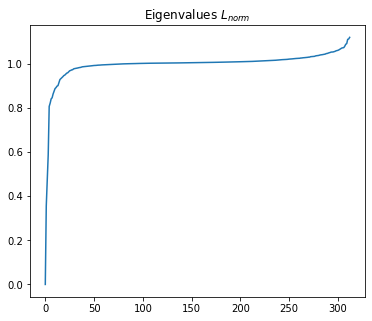

In [0]:
plt.figure(figsize=(6, 5))
plt.plot(lam)
plt.title('Eigenvalues $L_{norm}$')
plt.show()

In [0]:
def GFT(signal, U):
    return U.T @ signal

def iGFT(fourier_coefficients, U):
    return U @ fourier_coefficients

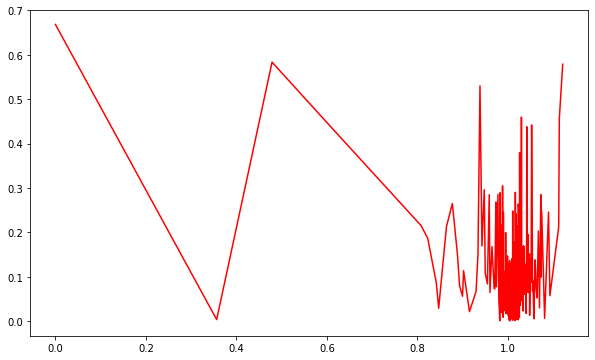

In [0]:
plt.figure(figsize=(10, 6))
plt.plot(lam, np.abs(GFT(ingr_signal,U)), 'r-') 

In [0]:
def ideal_graph_filter(x: np.ndarray, spectral_response: np.ndarray, U):
    """Return a filtered signal."""
    x_gft = GFT(x,U)
    filter_gft = x_gft * spectral_response
    return iGFT(filter_gft,U)

In [0]:
ideal_lp = np.ones(lam.shape)
ideal_lp[lam >= 1.1] = 0  # Low-pass filter with cut-off at lambda=1
ideal_lp[lam <= 0.8] = 0  # Low-pass filter with cut-off at lambda=1
x_lp = ideal_graph_filter(ingr_signal,ideal_lp,U)
print(x_lp)
print(max(x_lp))

[ 9.64014183e-03  8.94066072e-03 -2.09449980e-02 -1.52401833e-03
  2.20613823e-03  6.46753216e-03  6.97398746e-03 -1.82948940e-02
 -3.15487054e-02 -6.49805320e-02 -5.51394938e-02 -3.18547775e-02
  9.47948717e-03  6.30499599e-03 -1.39631141e-02  5.01357885e-03
  1.72259540e-02  3.21116514e-04 -2.99996832e-02 -1.00491760e-03
  9.92695149e-03  1.45005933e-02 -2.21453816e-02  9.47086258e-03
  1.87240034e-02  1.25417520e-02  1.46797513e-03 -1.78102426e-02
  6.95713351e-03  4.42573505e-03  7.26467029e-03  1.00787220e-02
  3.30119621e-03 -3.85050737e-02 -4.31938673e-03 -4.44989156e-02
  3.28389362e-03 -3.62614028e-04 -9.91252194e-03  3.18248437e-03
  9.62069740e-03  5.92926700e-02  7.26226233e-03 -9.25527052e-03
  5.55294025e-03 -8.82701758e-02  5.71748169e-03 -4.12218296e-02
  5.09789910e-03 -3.85882693e-03  8.27473698e-03 -1.28707462e-02
 -4.94519847e-02  2.66468741e-02  6.67435818e-03  8.80858625e-03
 -4.92524343e-03 -9.99717071e-03 -8.49875266e-02  2.76918190e-03
  7.68533983e-03 -4.47846

In [0]:
original_ingredients = ingredient_list[ingr_signal > 0]
print(df.iloc[test_recipe]['title'])
print(original_ingredients)

Salt Free, Low Cholesterol Sugar Cookies Recipe
['egg substitute, powder'
 'leavening agents, baking powder, double-acting, sodium aluminum sulfate'
 'oil, corn, peanut, and olive' 'orange juice, raw' 'sugars, granulated'
 'wheat flour, white, all-purpose, unenriched']


In [0]:
x_lp[ingr_signal > 0] = 0;
new_ingr_ndx = np.argmax(x_lp)
new_ingredient = ingredient_list[new_ingr_ndx]
print(new_ingredient)

butter, without salt


In [0]:
def predictNewIngredient(df, test_recipe, ingredient_list, adj_mat):
  ingr_signal = createIngredientSignal(df,test_recipe,ingredient_list)
  laplacian = compute_laplacian(adj_mat, normalize=True)
  lam, U = spectral_decomposition(laplacian)
  ideal_lp = np.ones(lam.shape)
  ideal_lp[lam >= 1] = 0  #too lowpass suggests only base ingredients
  ideal_lp[lam <= 0.8] = 0  # Low-pass filter with cut-off at lambda=1
  x_lp = ideal_graph_filter(ingr_signal,ideal_lp,U)
  x_lp[ingr_signal > 0] = 0;
  new_ingr_ndx = np.argmax(x_lp)
  new_ingredient = ingredient_list[new_ingr_ndx]
  recipe_name = df.iloc[test_recipe]['title']
  original_ingredients = ingredient_list[ingr_signal > 0]
  return new_ingredient, recipe_name, original_ingredients

In [0]:
def predictNewIngredient_graphShift(df, test_recipe, ingredient_list, adj_mat):
  ingr_signal = createIngredientSignal(df,test_recipe,ingredient_list)
  x_filtered = adj_mat @ ingr_signal
  x_filtered[ingr_signal > 0] = 0;
  new_ingr_ndx = np.argmax(x_filtered)
  new_ingr_ndx = np.argmax(x_lp)
  new_ingredient = ingredient_list[new_ingr_ndx]
  recipe_name = df.iloc[test_recipe]['title']
  original_ingredients = ingredient_list[ingr_signal > 0]
  return new_ingredient, recipe_name, original_ingredients

In [0]:
def predictNewIngredient_graphTotalVariance(df, test_recipe, ingredient_list, adj_mat):
  ingr_signal = createIngredientSignal(df,test_recipe,ingredient_list)
  gtvs = np.ones([len(ingr_signal),1])*10000
  lap = compute_laplacian(adj_mat, True)
  for i in range(len(ingr_signal)):
    new_ingr_signal = np.reshape(ingr_signal,(len(ingr_signal),1))
    if ingr_signal[i] == 0:
        new_ingr_signal[i] = 1
        gtv = new_ingr_signal.T @ lap @ new_ingr_signal
        gtvs[i] = gtv
        ingr_signal[i] = 0
  new_ingr_ndx = np.argmin(gtvs)
  new_ingredient = ingredient_list[new_ingr_ndx]
  recipe_name = df.iloc[test_recipe]['title']
  original_ingredients = ingredient_list[ingr_signal > 0]
  return new_ingredient, recipe_name, original_ingredients

In [0]:
test_recipes = [14, 8, 19, 39, 60, 73]
for tr in test_recipes:
  print("Recipe name: {1}\nOriginal Ingredients: {2}\nSuggested Ingredient: {0}\n".format(*predictNewIngredient(df, tr, ingredient_list, adj_mat)))

Recipe name: Broccoli Chicken Casserole Recipe
Original Ingredients: ['broccoli, raw' 'cheese, cheddar'
 'chicken, broiler or fryers, breast, skinless, boneless, meat only, raw'
 'lemon juice, raw'
 'rice, white, long-grain, regular, unenriched, cooked without salt'
 'salad dressing, mayonnaise, regular'
 'soup, cream of chicken, canned, condensed']
Suggested Ingredient: grapes, red or green (european type, such as thompson seedless), raw

Recipe name: Chocolate-Orange Angel Food Cake
Original Ingredients: ['cocoa, dry powder, unsweetened' 'egg, white, raw, fresh'
 'orange juice, raw' 'salt, table' 'sugars, granulated' 'sugars, powdered'
 'wheat flour, white, cake, enriched']
Suggested Ingredient: cream, whipped, cream topping, pressurized

Recipe name: Mango Lassi
Original Ingredients: ['mango nectar, canned' 'spices, saffron' 'sugars, granulated'
 'water, bottled, generic' 'yogurt, greek, plain, nonfat']
Suggested Ingredient: strawberries, raw

Recipe name: Creamy Curry Salad Dressin

First word of recipe only

In [0]:
def predictNewIngredientFirstWord(df, test_recipe, ingredient_list, adj_mat):
  ingr_signal = createIngredientSignalFirstWord(df,test_recipe,ingredient_list)
  laplacian = compute_laplacian(adj_mat, normalize=True)
  lam, U = spectral_decomposition(laplacian)
  ideal_lp = np.ones(lam.shape)
  ideal_lp[lam >= 1] = 0  #too lowpass suggests only base ingredients
  ideal_lp[lam <= 0.8] = 0  # Low-pass filter with cut-off at lambda=1
  x_lp = ideal_graph_filter(ingr_signal,ideal_lp,U)
  x_lp[ingr_signal > 0] = 0;
  new_ingr_ndx = np.argmax(x_lp)
  new_ingredient = ingredient_list[new_ingr_ndx]
  recipe_name = df.iloc[test_recipe]['title']
  original_ingredients = ingredient_list[ingr_signal > 0]
  return new_ingredient, recipe_name, original_ingredients

In [0]:
test_recipe = 2
new_ingredient, recipe_name, original_ingredients = predictNewIngredientFirstWord(df, test_recipe, ingredient_list, adj_mat)
print("Recipe name: {0}".format(recipe_name))
print("Original Ingredients: {0}".format(original_ingredients))
print("Suggested Ingredient: {0}".format(new_ingredient))

Recipe name: Honey Sriracha Chicken Wings
Original Ingredients: ['honey' 'soy sauce made from soy (tamari)']
Suggested Ingredient: oil, sesame, salad or cooking
